In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
raw_data = pd.read_csv('ia0_train.csv')
raw_data


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7972604355,5/21/2014,3,1.00,1020,7874,1.0,0,0,3,...,1020,0,1956,0,98106,47.5175,-122.346,1290,7320,2.1800
1,8731951130,6/9/2014,3,2.25,2210,8000,2.0,0,0,4,...,2210,0,1969,0,98023,47.3085,-122.381,1990,8000,2.5025
2,7885800740,2/18/2015,4,2.50,2350,5835,2.0,0,0,3,...,2350,0,2003,0,98042,47.3494,-122.153,3010,5772,2.7000
3,4232900940,5/22/2014,3,1.50,1660,4800,2.0,0,0,3,...,1660,0,1907,0,98119,47.6352,-122.358,1690,4000,9.2630
4,3275850190,9/5/2014,3,2.50,2410,9916,2.0,0,0,4,...,2410,0,1989,0,98052,47.6911,-122.103,2310,8212,7.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,4222500410,2/26/2015,4,1.75,2000,7350,1.0,0,0,3,...,1100,900,1963,0,98003,47.3428,-122.303,1720,7350,2.6700
7996,1150700170,9/26/2014,4,2.25,1870,6693,2.0,0,0,3,...,1870,0,1996,0,98003,47.2774,-122.299,1650,6518,2.9900
7997,1959702045,11/19/2014,2,1.00,1240,5500,1.0,0,0,3,...,1240,0,1954,0,98102,47.6461,-122.317,2080,4400,9.0000
7998,7234601221,10/14/2014,3,1.50,1280,2114,1.5,0,0,3,...,1280,0,1904,0,98122,47.6174,-122.308,1540,1456,6.8750


In [6]:
raw_data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object

In [7]:
#1 drop the ID column
data_without_id = raw_data.drop(columns=['id'])
data_without_id.dtypes

date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object

In [8]:
#2 handle the date feature and convert it to datetime
data_without_id['date']=pd.to_datetime(data_without_id['date'], format='%m/%d/%Y')
#extract month, day and year into separate columns
data_without_id['SaleMonth']= data_without_id['date'].dt.month
data_without_id['SaleDat']= data_without_id['date'].dt.day
data_without_id['SaleYear']= data_without_id['date'].dt.year
#drop the original date column
data_without_id=data_without_id.drop(columns=['date'])
data_without_id.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
SaleMonth          int32
SaleDat            int32
SaleYear           int32
dtype: object

In [10]:
#group the data by the 'bedrooms' column and calculate statistics for 'price'
bedroom_stats=data_without_id.groupby('bedrooms')['price'].agg(['mean','median', 'min', 'max', 'count'])
bedroom_stats

,mean,median,min,max,count
bedrooms,,,,,
1,3.340914,3.146,0.89950,12.50,80
2,3.917504,3.700,0.82500,17.00,1035
3,4.667360,4.170,0.82000,38.00,3579
4,6.305826,5.500,1.39000,40.00,2600
5,7.582359,6.190,1.58550,53.50,591
6,8.652208,6.700,2.30000,68.90,95
7,9.530048,5.650,3.10000,24.50,12
8,6.915000,6.915,5.75000,8.08,2
9,7.446663,7.000,5.99999,9.34,3


In [11]:
#group the data by the 'bathrooms' column and calculate statistics for 'price'
bathroom_stats=data_without_id.groupby('bathrooms')['price'].agg(['mean','median', 'min', 'max', 'count'])
bathroom_stats

,mean,median,min,max,count
bathrooms,,,,,
0.50,2.640000,2.64000,2.5500,2.730,2
0.75,3.218479,2.90000,1.0000,5.621,23
1.00,3.482674,3.24400,0.8200,13.000,1404
1.25,6.156500,3.21950,2.7500,12.500,3
1.50,4.136978,3.75000,1.3400,13.800,542
1.75,4.554531,4.30000,1.2075,15.000,1131
2.00,4.522037,4.10000,1.1500,17.000,723
2.25,5.301349,4.65000,1.6000,24.000,746
2.50,5.557118,5.00000,1.5800,29.000,2000


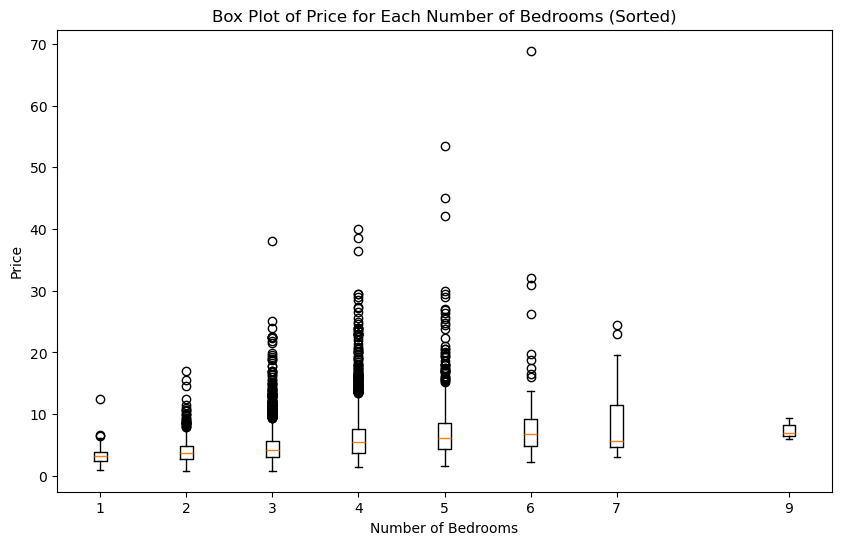

In [14]:
#find the unique number of bedrooms in the data
unique_bedrooms=sorted(data_without_id['bedrooms'].unique())
# Create a box plot of 'price' for each unique number of bedrooms with at least 3 examples
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for num in unique_bedrooms:
    bedroom_data = data_without_id[data_without_id['bedrooms'] == num]['price']

    # Skip plotting if there are less than 3 examples with this number of bedrooms. you can remove the skipping and see the effect.
    if len(bedroom_data) >= 3:
        plt.boxplot(bedroom_data, positions=[num], labels=[num], showfliers=True)

# Add labels and a title to the plot
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Box Plot of Price for Each Number of Bedrooms (Sorted)')

# Show the plot
plt.show()

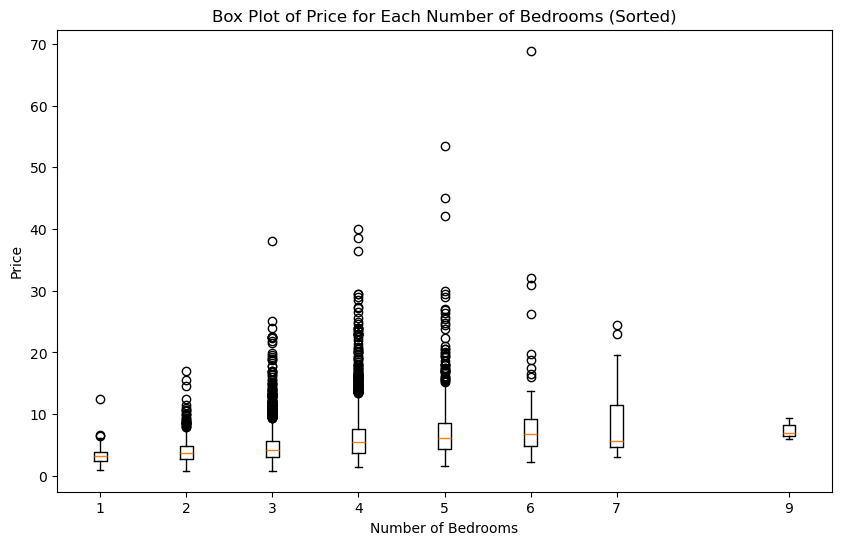

In [15]:
# Create a box plot of 'price' for each unique number of bedrooms with at least 3 examples
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for num in unique_bedrooms:
    bedroom_data = data_without_id[data_without_id['bedrooms'] == num]['price']

    # Skip plotting if there are less than 3 examples with this number of bedrooms. you can remove the skipping and see the effect.
    if len(bedroom_data) >= 3:
        plt.boxplot(bedroom_data, positions=[num], labels=[num], showfliers=True)

# Add labels and a title to the plot
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Box Plot of Price for Each Number of Bedrooms (Sorted)')

# Show the plot
plt.show()

c:\Users\Katie\miniconda3\envs\mltest\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


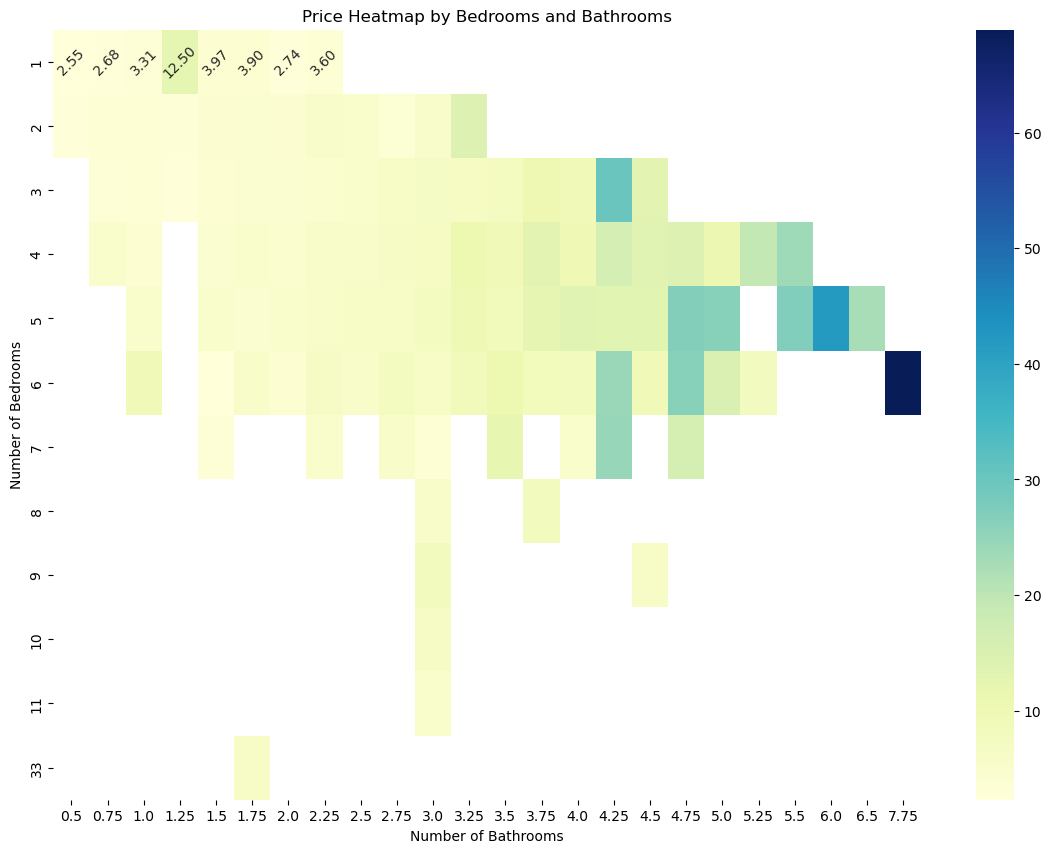

In [25]:
import seaborn as sns

# Create a pivot table to prepare data for the heatmap
pivot_table = data_without_id.pivot_table(index='bedrooms', columns='bathrooms', values='price', aggfunc='mean')

# Create a heatmap using seaborn
plt.figure(figsize=(14, 10))  # Adjust the figure size if needed
heatmap = sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True)

for text in heatmap.texts:
    text.set(rotation=45)

# Add labels and a title to the plot
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Bedrooms')
plt.title('Price Heatmap by Bedrooms and Bathrooms')

# Show the plot
plt.show()

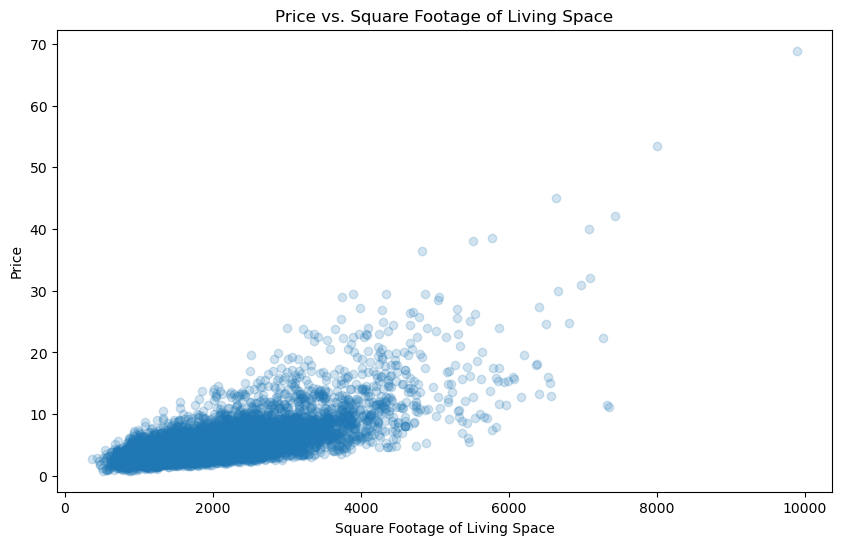

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(data_without_id['sqft_living'], data_without_id['price'], alpha=0.2)

#add labels and a title
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
plt.title('Price vs. Square Footage of Living Space')

plt.show()


In [29]:
data_without_id[["sqft_living", "sqft_lot", "sqft_living15", "sqft_lot15", "sqft_above", "sqft_basement"]].corr()

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_above,sqft_basement
sqft_living,1.000000,0.164651,0.762189,0.178888,0.878699,0.416699
sqft_lot,0.164651,1.000000,0.139211,0.774133,0.176956,0.007146
sqft_living15,0.762189,0.139211,1.000000,0.171446,0.737738,0.188109
sqft_lot15,0.178888,0.774133,0.171446,1.000000,0.190612,0.010897
sqft_above,0.878699,0.176956,0.737738,0.190612,1.000000,-0.067804
sqft_basement,0.416699,0.007146,0.188109,0.010897,-0.067804,1.000000


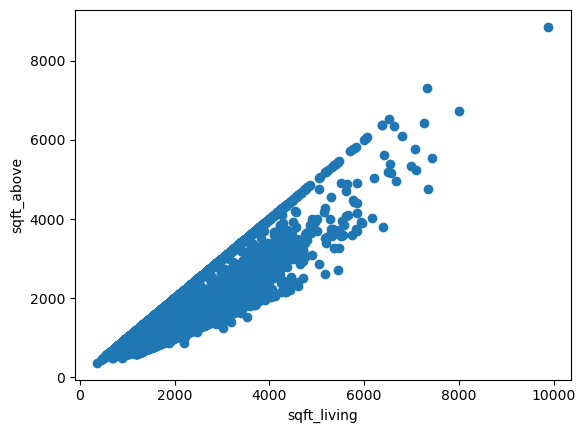

In [30]:
plt.scatter(data_without_id['sqft_living'].values, data_without_id['sqft_above'].values)
plt.xlabel("sqft_living")
plt.ylabel("sqft_above")
plt.show()

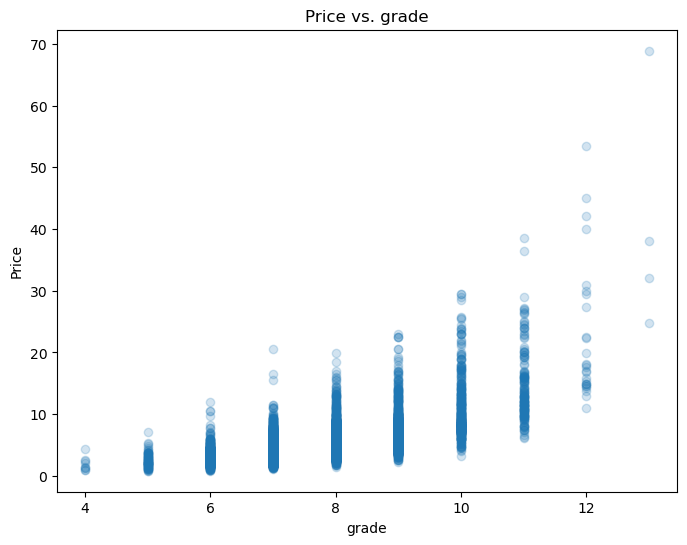

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(data_without_id['grade'], data_without_id['price'], alpha=0.2)

#add labels and a title
plt.xlabel('grade')
plt.ylabel('Price')
plt.title('Price vs. grade')

plt.show()


In [60]:
unique_floors=sorted(data_without_id['floors'].unique())
unique_floors


[1.0, 1.5, 2.0, 2.5, 3.0, 3.5]

In [62]:
# One-Hot Encoding: 
# create a sample dataframe with a categorical variable
df = pd.DataFrame({'floors': ['1.0', '1.5', '2.0', '2.5', '3.0', '3.5']})

# perform one-hot encoding on the 'color' column
one_hot = pd.get_dummies(df['floors'])

# concatenate the one-hot encoding with the original dataframe
df1 = pd.concat([df, one_hot], axis=1)

# drop the original 'color' column
df1 = df1.drop('floors', axis=1)
df1

,1.0,1.5,2.0,2.5,3.0,3.5
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,True,False,False
4,False,False,False,False,True,False
5,False,False,False,False,False,True
